#### Muhammad Kevin Alrahmanto (19/445592/PA/19416) ft. $Openai.com$

**Ensemble boosting methods** are a type of machine learning algorithm that combines the predictions of multiple weak models to produce a strong prediction. The idea behind boosting is to train weak models sequentially, each time giving more weight to the samples that the previous model got wrong. The final prediction is obtained by combining the predictions of all weak models, usually by taking a weighted average.

In summary, ensemble boosting methods are a way to improve the performance of machine learning models by combining the predictions of multiple weak models to form a stronger overall prediction.


**Ensemble Boosting** is a machine learning technique for combining multiple weak models to form a strong model. It works by training many weak models sequentially and each model focuses on correcting the mistakes made by the previous model.

The final prediction is obtained by combining the predictions of all individual weak models using a weighted sum, where the weight is proportional to the accuracy of the model. The most popular form of boosting is Adaboost (Adaptive Boosting), which adjusts the weights of the training samples based on the errors made by the previous model, so that the subsequent models pay more attention to the samples that are difficult to predict.

**Gradient Boosting and AdaBoost are both ensemble learning algorithms that combine multiple weak models to form a strong model for prediction. However, there are several key differences between the two**

1. Loss Function: Gradient Boosting optimizes the loss function by adjusting the predictions of the weak models to minimize the residuals, while AdaBoost optimizes the loss function by adjusting the weights of the training samples based on the errors made by the previous model.

2. Model Complexity: Gradient Boosting allows for the use of any weak model, while AdaBoost requires the weak model to be a simple classifier, such as a decision tree with a single split.

3. Training Process: Gradient Boosting trains the weak models sequentially, each model correcting the mistakes made by the previous model. AdaBoost trains the weak models one at a time, and adjusts the weights of the training samples based on the errors made by the previous model.

4. Model Accuracy: Gradient Boosting can lead to overfitting if the number of weak models is too high, while AdaBoost is less prone to overfitting. However, Gradient Boosting has been shown to produce more accurate models on some datasets compared to AdaBoost.

In summary, Gradient Boosting is a more flexible and powerful algorithm compared to AdaBoost, but it requires careful tuning of the hyperparameters to prevent overfitting. AdaBoost is a simpler and faster algorithm, but it may not produce as accurate models as Gradient Boosting on some datasets.

# 0. Warming Up

Scaling transforms the data to have a minimum value of 0 and a maximum value of 1, while standardization scales the data to have a mean of 0 and a standard deviation of 1. You can see from the histograms how these transformations affect the shape of the distribution of the data.

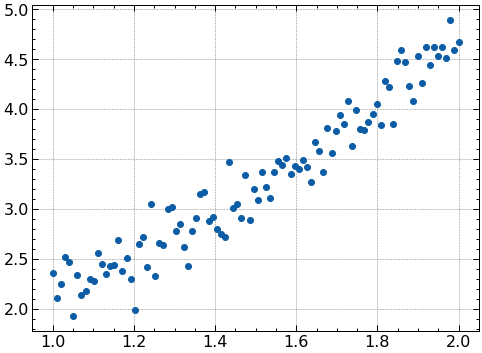

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# simulate data
np.random.seed(0)
x=np.linspace(1, 2, 100)
data = 2*x**1.2+ 0.2*np.random.randn(100)
plt.scatter(x, data)

# scale data
scaled_data = (data - np.min(data)) / (np.max(data) - np.min(data))

# standardize data
standardized_data = (data - np.mean(data)) / np.std(data)

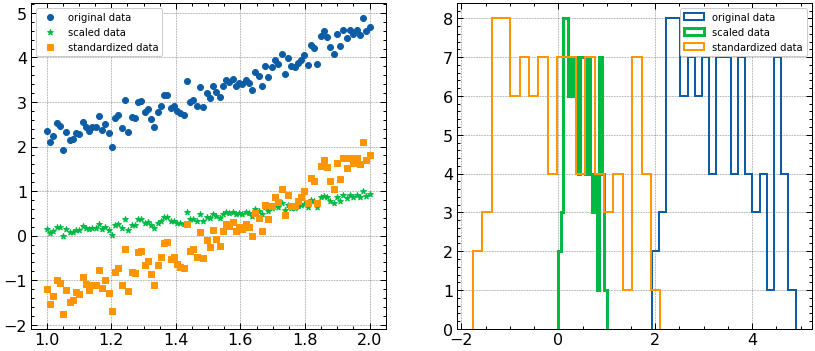

In [51]:
fig, ax=plt.subplots(1, 2, figsize=(14, 6))
ax[0].scatter(x,data, label="original data",marker='o')
ax[0].scatter(x,scaled_data,  label="scaled data",marker='*')
ax[0].scatter(x,standardized_data,label="standardized data",marker='s' )
ax[0].legend(fontsize=10, title_fontsize=15)


ax[1].hist(data, bins=20, label="original data", histtype='step', lw=2)
ax[1].hist(scaled_data, bins=20, label="scaled data", histtype='step', lw=3)
ax[1].hist(standardized_data, bins=20, label="standardized data", histtype='step', lw=2)
ax[1].legend(fontsize=10, title_fontsize=15);

# 1. AdaBoost

AdaBoost is a machine learning algorithm that helps to improve the accuracy of a prediction by combining the outputs of multiple simpler models.

Think of it like a team of people trying to predict the answer to a question. Each person has a limited understanding of the subject, but by combining their answers, the team can make a more accurate prediction. In the same way, AdaBoost combines the predictions of multiple simpler models to form a more accurate overall prediction.

**AdaBoost (Adaptive Boosting) is a machine learning algorithm that works by combining multiple weak models to create a strong overall model. Here's a high-level overview of how AdaBoost works:**

1. Initialize the weights: The weights of the samples in the training set are initialized to be equal. This means that each sample has the same influence on the model training process.

2. Train the first weak model: The first weak model is trained on the training set with the current sample weights. This model is then used to make predictions on the training set.

3. Update the sample weights: The samples that were misclassified by the first weak model are given more weight, while the samples that were correctly classified are given less weight. This adjusts the influence of each sample on the training process.

4. Train the second weak model: The second weak model is trained on the training set with the updated sample weights.

5. Repeat steps 3 and 4: Steps 3 and 4 are repeated multiple times to train multiple weak models. Each time the sample weights are updated based on the misclassified samples from the previous weak model.

6. Combine the weak models: The predictions of all the weak models are combined, usually by taking a weighted average of their predictions. The weights of the weak models are determined based on their accuracy on the training set.

7. Make predictions: The final model is used to make predictions on new data.

8. AdaBoost is an iterative algorithm that trains multiple weak models, each time adjusting the weights of the samples to give more importance to the samples that were misclassified by the previous models. This helps to produce a strong overall model that is able to accurately predict the class of new samples.

## 1.1. Scratch

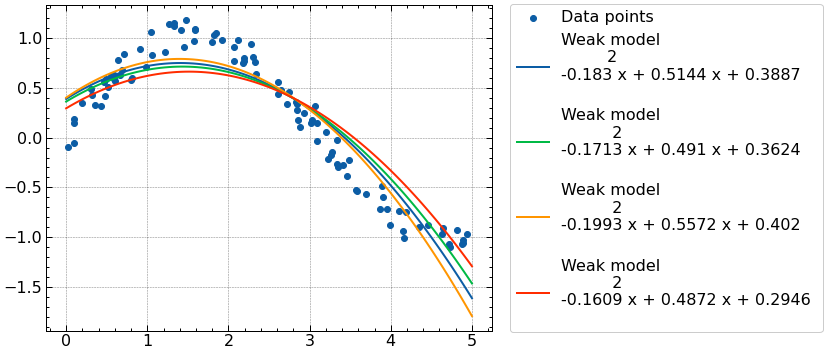

In [74]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate data
np.random.seed(0)
n_samples = 100
x = np.sort(5 * np.random.rand(n_samples))

y = np.sin(x) + 0.1 * np.random.randn(n_samples)
#y = x**3 -2*x + 0.1 * np.random.randn(n_samples)

# Initialize weights
weights = np.ones(n_samples) / n_samples

# Define the base regression model
def base_regressor(x, y, sample_weight):
    return np.poly1d(np.polyfit(x, y, deg=2, w=sample_weight))

# Train multiple weak models
weak_models = []
weights_models = []
for i in range(4):
    model = base_regressor(x, y, weights)
    weak_models.append(model)
    y_predict = model(x)
    error = np.abs(y_predict - y)
    error_weight = error / error.sum()
    weights = np.minimum(1, error_weight)
    weights = weights / weights.sum()
    weights_models.append(weights)

# Plot the result
plt.scatter(x, y, label='Data points')
x_plot = np.linspace(0, 5, 100)
for model, weight in zip(weak_models, weights_models):
    y_plot = model(x_plot)
    plt.plot(x_plot, y_plot, label=f'Weak model \n {model} \n')
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0);

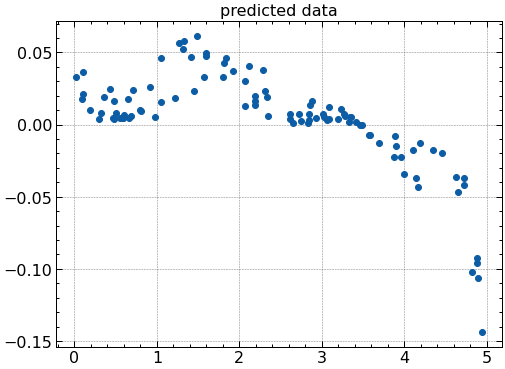

In [39]:
#Define the final model
def final_model(x, weak_models, weights_models):
    y_predict = np.zeros_like(x)
    for model, weight in zip(weak_models, weights_models):
        y_predict += weight * model(x)
    return y_predict

# Make a new prediction
y_new = final_model(x, weak_models, weights_models)
plt.scatter(x, y_new)
plt.title('predicted data');

## 1.2. Sklearn

### a. Simulated Data ( AdaBoostRegressor)

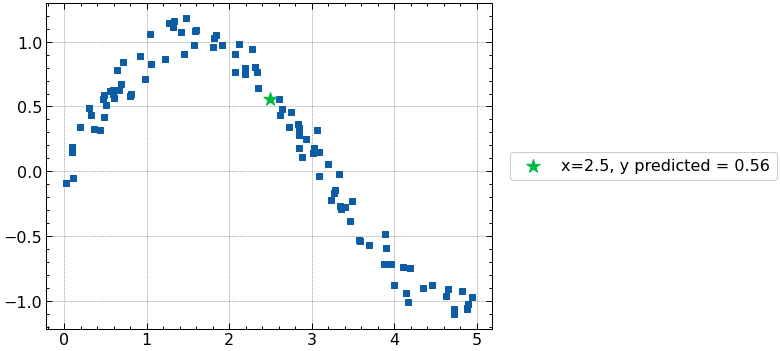

In [64]:
import numpy as np
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Simulate data
np.random.seed(0)
n_samples = 100
x = np.sort(5 * np.random.rand(n_samples))
y = np.sin(x) + 0.1 * np.random.randn(n_samples)

# Train the model
base_regressor = DecisionTreeRegressor(max_depth=4)
model = AdaBoostRegressor(base_estimator=base_regressor, n_estimators=100, random_state=0)
model.fit(x.reshape(-1, 1), y)

# Make a prediction
x_new = np.array([2.5]).reshape(-1, 1)
y_new = model.predict(x_new)

plt.scatter(x, y, marker='s' )
plt.scatter(x_new,y_new, marker='*',s=200, label=f'x={x_new[0][0]}, y predicted = {np.round(y_new[0],2)}')
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0);

### b. California Housing Dataset (AdaBoostRegressor)

In [193]:
import pandas as pd
import numpy as np
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the dataset
url = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv"
df = pd.read_csv(url)
df=df.dropna()
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [194]:
# Split the data into training and test sets
X = df.drop("median_house_value", axis=1)
X = df.drop("ocean_proximity", axis=1)
y = df["median_house_value"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [195]:
# Train the model
base_regressor = DecisionTreeRegressor(max_depth=4)
model = AdaBoostRegressor(base_estimator=base_regressor, n_estimators=100, random_state=0)
model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print("Mean Squared Error:", np.mean((y_pred - y_test) ** 2))

Mean Squared Error: 3885572.77
Mean Squared Error: 3885572.7726568845


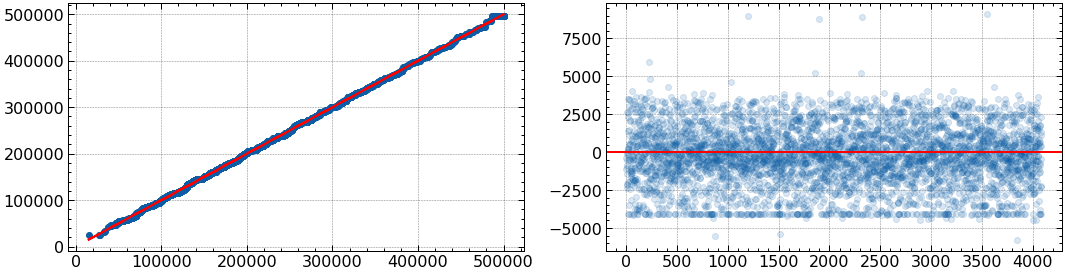

In [196]:
fig,ax= plt.subplots(1, 2, figsize=(15, 4))
ax[0].plot(y_test, y_test, color='red')
ax[0].scatter(y_test, y_pred)

ax[1].scatter(range(len(y_pred)), y_pred-y_test, alpha=0.15)
ax[1].axhline(0, color='red');

plt.tight_layout()

1. base_estimator: This parameter specifies the base regression estimator to be used. By default, it uses a decision tree regressor. You can use any other regression estimator that implements fit method.

2. n_estimators: This parameter specifies the number of base estimators in the ensemble. The default value is 50.

3. learning_rate: This parameter controls the contribution of each base estimator in the final prediction. A lower value of learning_rate means that the base estimators have a smaller contribution to the final prediction, which results in a slower convergence but a lower risk of overfitting.

4. loss: This parameter specifies the loss function to be used for boosting. The default loss function is 'linear'. You can also use other loss functions such as 'square', 'exponential', etc.

5. random_state: This parameter specifies the random number generator seed for reproducibility of results.


**Create an AdaBoostRegressor object with a decision tree as the base estimator**

### c. Iris (AdaBoostClassifier)

In [90]:
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an AdaBoost classifier on the training data
clf = AdaBoostClassifier()
clf.fit(X_train, y_train)

# Use the trained classifier to make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 1.0


Note that the AdaBoostClassifier **uses a decision tree as the base classifier by default**. You can specify a different base classifier using the base_estimator parameter.

## 1.3 GridsearchCV 

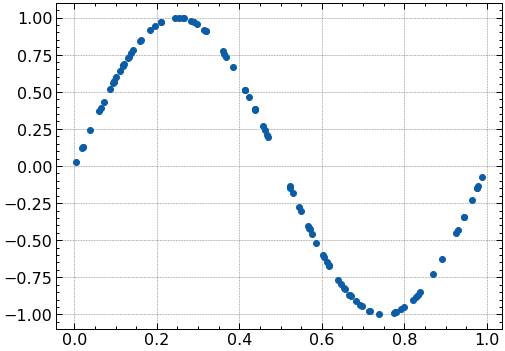

In [203]:
import numpy as np
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Generating simulated data
np.random.seed(0)
X = np.random.rand(100, 1)
y = np.sin(2 * np.pi * X).ravel()
plt.scatter(x, y);

In [204]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initialize Adaboost Regressor
reg = AdaBoostRegressor()

# Define hyperparameter search space
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(reg, param_grid, cv=5)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Predict and evaluate results on the testing data
y_pred = grid_search.predict(X_test)
score = grid_search.score(X_test, y_test)

# Print the best parameters and score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", score)

Best parameters:  {'learning_rate': 1.0, 'n_estimators': 200}
Best score:  0.9822596257723935


AdaBoost Regressor is a machine learning algorithm that uses an ensemble of weak regression models to create a strong regression model. The following are the most commonly used parameters in AdaBoost Regressor:

1. base_estimator: The base estimator to fit on random subsets of the dataset. By default, it is a decision tree regressor (DecisionTreeRegressor).

2. n_estimators: The number of weak estimators to use in the ensemble. The larger the number, the more accurate the model, but also the slower it will be to train.

3. learning_rate: The learning rate of the algorithm, which determines the contribution of each weak estimator in the final prediction. A smaller learning rate requires more weak estimators to produce a good model.

4. algorithm: The algorithm used to fit the weak estimators. The default is "SAMME.R", which uses the SAMME.R algorithm for multiclass classification problems, but can also be set to "SAMME".

5. random_state: The random number generator seed to use when randomly selecting subsets of the training data.

6. loss: The loss function to use when training the weak estimators. The default is "linear", but other options include "square", "exponential", etc.

# 2. Gradient Boosting Method

**Gradient Boosting is a machine learning technique used to make predictions. It works by combining multiple simple models to create a more powerful, accurate prediction model.**

Imagine you are trying to predict the height of a person based on their age and weight. A simple model could be to just use the person's weight to make the prediction. However, this simple model may not be very accurate. Gradient Boosting takes this simple model and adds another model that corrects the mistakes made by the first model. This process is repeated multiple times, each time correcting the mistakes made by the previous models, until the final prediction model is created.

In this way, Gradient Boosting builds a prediction model in a step-by-step manner, gradually improving its accuracy by learning from the mistakes made in the previous steps. This final model is a combination of multiple simple models, each of which contributes to the overall accuracy of the final prediction.

So, in simple terms, Gradient Boosting is a method that uses multiple simple models to make a more accurate prediction.

**Gradient Boosting works by building an ensemble of weak models and combining their predictions to form a strong prediction model. The algorithm trains these weak models in a sequential manner, each model correcting the mistakes made by the previous model. The final prediction is obtained by combining the predictions of all individual weak models.**

Here's a high-level overview of the Gradient Boosting algorithm:

1. Initialize the weights of the training samples: The weights of the training samples are initialized to a uniform distribution to give each sample an equal chance of being selected in the first iteration.

2. Fit a weak model to the training data: A weak model, such as a decision tree, is trained on the training data. This model is used to make predictions on the training data.

3. Calculate the residuals: The residuals are calculated as the difference between the actual target values and the predictions made by the weak model.

4. Update the weights of the training samples: The weights of the training samples are updated based on the residuals. The samples that are difficult to predict are given a higher weight to emphasize their importance in the next iteration.

5. Fit another weak model to the updated training data: Another weak model is trained on the updated training data. The process of fitting a weak model and updating the weights is repeated for several iterations.

6. Combine the weak models to form a strong prediction model: The final prediction is obtained by combining the predictions of all individual weak models. This is usually done by taking a weighted sum of the predictions, where the weights are proportional to the accuracy of each model.

In Gradient Boosting, the loss function is optimized by adjusting the predictions of the weak models to minimize the residuals. The optimization process is done using gradient descent, hence the name Gradient Boosting.

Gradient Boosting is a powerful machine learning algorithm that has been shown to perform well on a variety of tasks, such as regression and classification. However, it can be computationally expensive, and careful tuning of the hyperparameters is required to prevent overfitting.

## 2.1 Scratch 

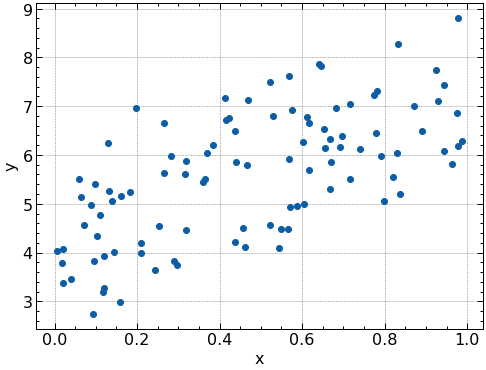

In [129]:
import numpy as np
import pandas as pd
def gradient_descent(X, y, theta, learning_rate, num_iters):
    m = y.shape[0]
    thetas=[]
    for i in range(num_iters):
        y_pred = X.dot(theta)
        error = y_pred - y
        gradient = (2/m) * X.T.dot(error)
        theta = theta - learning_rate * gradient
        thetas.append(theta)
    return theta, np.array(thetas)

# Generate the data
intercept=4
theta_1=3

np.random.seed(0)
m = 100
X = np.random.rand(m, 1)
y = intercept +  theta_1* X + np.random.randn(m, 1)
plt.scatter(X, y)
plt.xlabel('x')
plt.ylabel('y');

In [130]:
# Add the bias column
X = np.c_[np.ones((m, 1)), X]

# Initialize theta
theta = np.random.randn(2, 1)

# Set the hyperparameters
learning_rate = 0.01
num_iters = 1000

# Perform gradient descent
theta, thetas = gradient_descent(X, y, theta, learning_rate, num_iters)

# Print the result
print("Theta after gradient descent: ", theta[1])
print("Intercept after gradient descent: ", theta[0])

Theta after gradient descent:  [2.52255827]
Intercept after gradient descent:  [4.4321465]


In this example, the gradient_descent function takes in the input data X, target data y, and the initial parameters theta, the learning rate learning_rate, and the number of iterations num_iters to perform. The function uses these inputs to perform gradient descent and update the theta values to minimize the mean squared error between the predicted and actual values. The generated data consists of m samples of X and y, which are related by the equation y = 4 + 3 * X + noise. The theta values are initialized randomly, and the gradient descent algorithm updates them until convergence (or until the maximum number of iterations is reached).

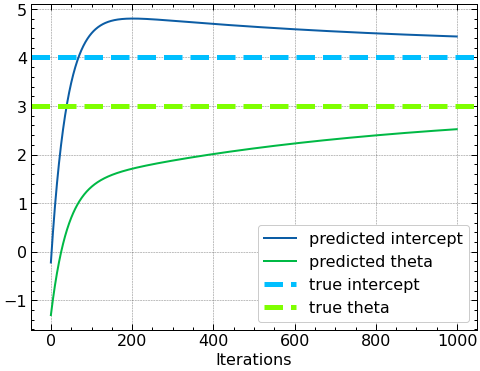

In [133]:
plt.plot(range(num_iters), pd.DataFrame(thetas.reshape((num_iters, 2)))[0], label='predicted intercept')
plt.plot(range(num_iters), pd.DataFrame(thetas.reshape((num_iters, 2)))[1], label='predicted theta')
plt.xlabel('Iterations')
plt.axhline(intercept, label='true intercept', ls='--', color='#00BFFF', lw=5)
plt.axhline(theta_1, label='true theta', ls='--', color='#7FFF00', lw=5)

plt.legend()
plt.show();

At each iteration, the gradient of the loss function with respect to the predicted values is calculated, and a decision tree is fit to this gradient to produce a new prediction. This prediction is then added to the current prediction, reducing the gradient and thus the loss function. The process is repeated until a stopping criterion is met, such as reaching **a maximum number of iterations** or a minimum value of the loss function.

In summary, **gradient in gradient boosting refers to the rate of change of the loss function,** which is used to guide the model building process in each iteration.

## 2.2 Sklearn (GradientBoostingClassifier)

In [139]:
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier

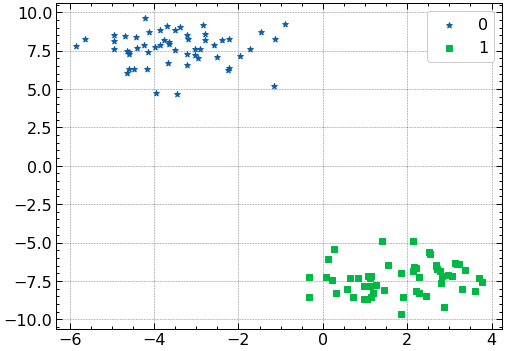

In [181]:
# Generate simulated data
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=110, centers=2, n_features=2,
                random_state=2023)
plt.scatter(np.transpose(X[np.where(y==0)])[0], np.transpose(X[np.where(y==0)])[1],marker='*', label='0')
plt.scatter(np.transpose(X[np.where(y==1)])[0], np.transpose(X[np.where(y==1)])[1],marker='s', label= '1')
plt.legend();

In [183]:
# Split data into training and test sets
train_data = X[:80]
train_target = y[:80]
test_data = X[80:]
test_target = y[80:]

# Initialize gradient boosting classifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)

# Train the model on the training data
gbc.fit(train_data, train_target)

# Evaluate the model on the test data
accuracy = gbc.score(test_data, test_target)
print("Accuracy: {:.2f}".format(accuracy))

Accuracy: 1.00


## 2.3 SKlearn (GradientBoostingRegressor)

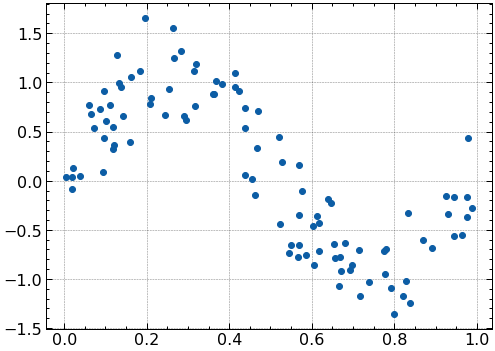

In [186]:
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor

# Generate simulated data
np.random.seed(0)
X = np.random.rand(100, 1)
y = np.sin(X * 2 * np.pi) + np.random.normal(scale=0.3, size=(100, 1))
plt.scatter(x, y);

In [184]:
# Split the data into training and test sets
X_train, X_test = X[:80], X[80:]
y_train, y_test = y[:80], y[80:]

# Train the model
reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0)
reg.fit(X_train, y_train.ravel())

# Predict on the test data
y_pred = reg.predict(X_test)

# Print the mean squared error of the predictions
print("Mean Squared Error:", np.mean((y_pred - y_test.ravel()) ** 2))

Mean Squared Error: 0.10421174854756354


The Gradient Boosting Regressor is set up with 100 trees, a learning rate of 0.1, and a max depth of 1. The mean squared error of the predictions on the test data is then calculated and printed as an evaluation metric.

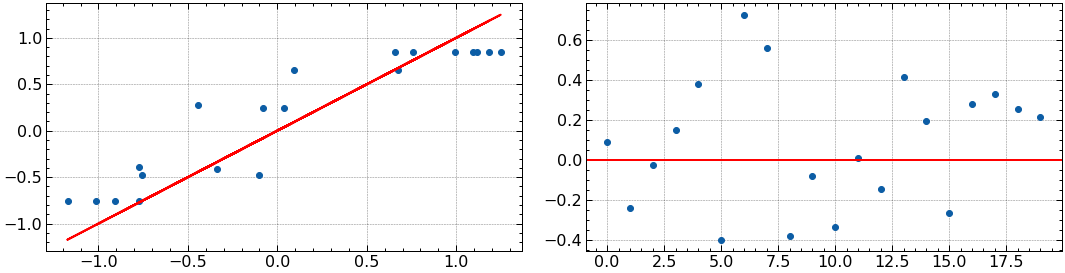

In [188]:
fig,ax= plt.subplots(1, 2, figsize=(15, 4))
ax[0].plot(y_test.ravel(), y_test, color='red')
ax[0].scatter(y_test.ravel(), y_pred)

ax[1].scatter(range(len(y_pred)), y_pred-y_test.ravel())
ax[1].axhline(0, color='red');

plt.tight_layout()

## 2.4 California Housing Dataset

In [197]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

# Load the dataset
url = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv"
df = pd.read_csv(url)
df=df.dropna()
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [198]:
# Split the data into training and test sets
X = df.drop("median_house_value", axis=1)
X = df.drop("ocean_proximity", axis=1)
y = df["median_house_value"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the model
reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0)
reg.fit(X_train, y_train)

# Predict on the test data
y_pred = reg.predict(X_test)

# Print the mean squared error of the predictions
print("Mean Squared Error:", np.mean((y_pred - y_test) ** 2))

Mean Squared Error: 12725158.594209367


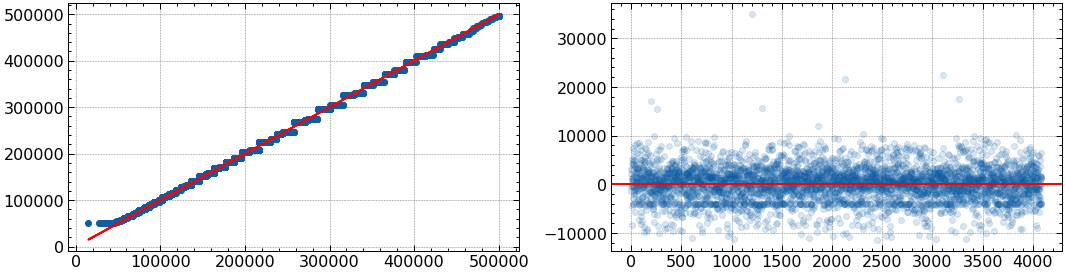

In [199]:
fig,ax= plt.subplots(1, 2, figsize=(15, 4))
ax[0].plot(y_test, y_test, color='red')
ax[0].scatter(y_test, y_pred)

ax[1].scatter(range(len(y_pred)), y_pred-y_test, alpha=0.15)
ax[1].axhline(0, color='red');

plt.tight_layout()

## 2.5 Iris Dataset

In [200]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
dataset = load_iris()
X, y = dataset.data, dataset.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the model
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0)
clf.fit(X_train, y_train)

# Predict on the test data
y_pred = clf.predict(X_test)

# Print the accuracy of the predictions
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0
